In [57]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as  hub
import tensorflow_datasets as tfds
import  numpy as np

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

Using TensorFlow backend.


In [4]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
Classifier = "https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/4"
image_res = 299

In [30]:
model = tf.keras.Sequential([hub.KerasLayer(Classifier, input_shape=(image_res, image_res, 3)),
                             layers.Dense(7)
                            ])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1001)              55875273  
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 7014      
Total params: 55,882,287
Trainable params: 7,014
Non-trainable params: 55,875,273
_________________________________________________________________


In [12]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator       = ImageDataGenerator(rescale=1./255)

In [13]:
IMG_SHAPE = 299

In [14]:
train_dir = '../data/faces/train/'
val_dir = '../data/faces/val/'

In [39]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=100,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary')

Found 155 images belonging to 7 classes.


In [41]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=10,
                                                              directory=val_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 35 images belonging to 7 classes.


In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1001)              55875273  
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 7014      
Total params: 55,882,287
Trainable params: 7,014
Non-trainable params: 55,875,273
_________________________________________________________________


In [48]:
EPOCHS = 40
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(155 / float(100))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(35 / float(10)))
)

Train for 2 steps, validate for 4 steps
Epoch 1/40
2/2 [==============================] - 13s 7s/step - loss: 0.1745 - accuracy: 1.0000 - val_loss: 0.6025 - val_accuracy: 0.7714
Epoch 2/40
2/2 [==============================] - 15s 8s/step - loss: 0.1640 - accuracy: 1.0000 - val_loss: 0.6006 - val_accuracy: 0.8000
Epoch 3/40
2/2 [==============================] - 15s 7s/step - loss: 0.1875 - accuracy: 0.9714 - val_loss: 0.5983 - val_accuracy: 0.8000
Epoch 4/40
2/2 [==============================] - 16s 8s/step - loss: 0.2209 - accuracy: 0.9250 - val_loss: 0.6044 - val_accuracy: 0.8000
Epoch 5/40
2/2 [==============================] - 16s 8s/step - loss: 0.2037 - accuracy: 0.9750 - val_loss: 0.6128 - val_accuracy: 0.8000
Epoch 6/40
2/2 [==============================] - 15s 8s/step - loss: 0.1892 - accuracy: 0.9500 - val_loss: 0.6280 - val_accuracy: 0.8000
Epoch 7/40
2/2 [==============================] - 15s 7s/step - loss: 0.2078 - accuracy: 0.9429 - val_loss: 0.6276 - val_accuracy: 0

In [52]:
history.history

{'loss': [0.17454103380441666,
  0.16396179050207138,
  0.18715990015438624,
  0.22088319808244705,
  0.20371123403310776,
  0.18920214846730232,
  0.2088852652481624,
  0.2233334630727768,
  0.1570487879216671,
  0.2197909951210022,
  0.1977684125304222,
  0.18898348936012813,
  0.17235274240374565,
  0.18294720564569747,
  0.16791357845067978,
  0.18941321117537363,
  0.18672314286231995,
  0.179890975356102,
  0.1725592464208603,
  0.11810258669512612,
  0.1408958328621728,
  0.14034897834062576,
  0.17200499027967453,
  0.15903884917497635,
  0.17763236910104752,
  0.14022038877010345,
  0.17829852657658712,
  0.16488118469715118,
  0.21007218956947327,
  0.17604421824216843,
  0.15253669768571854,
  0.13587257904665812,
  0.17518429458141327,
  0.11552349105477333,
  0.09607491003615516,
  0.16759845986962318,
  0.12572023645043373,
  0.11922162398695946,
  0.15397727489471436,
  0.1418107971549034],
 'accuracy': [1.0,
  1.0,
  0.9714286,
  0.925,
  0.975,
  0.95,
  0.94285715,
  

In [49]:
model.save('keras.h5')

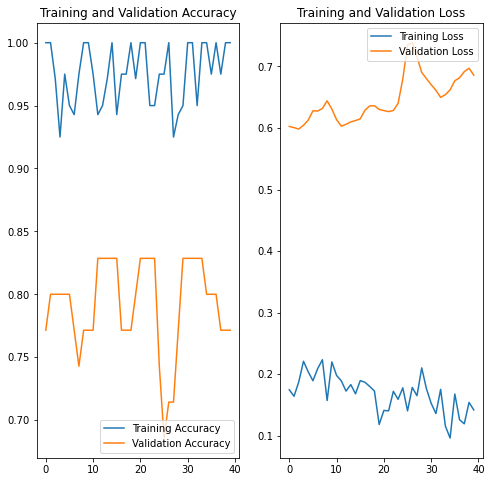

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

In [60]:
#model = load_model('keras.h5')
new_model = tf.keras.models.load_model('keras.h5',custom_objects={'KerasLayer':hub.KerasLayer})
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1001)              55875273  
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 7014      
Total params: 55,882,287
Trainable params: 7,014
Non-trainable params: 55,875,273
_________________________________________________________________
